# Sales Analysis

In [42]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [43]:
# Merge 12 months data into single csv file sales.csv

# get the files name in the data/raw directory
files = [file for file in os.listdir("../data/raw")]

# create empty dataframe to store the all months data
all_months_data = pd.DataFrame()

for file in files:
    # read each file in data/raw directory
    current_data = pd.read_csv("../data/raw/"+file)
    # concatenate the all months data frame and currently readed file data
    all_months_data = pd.concat([all_months_data, current_data])

# store the all months data in to data/processed/all_month_sales.csv file without index number
all_months_data.to_csv("../data/processed/all_month_sales.csv", index=False)

In [44]:
all_month_sales = pd.read_csv("../data/processed/all_month_sales.csv")

# Note: dropna(how="any") removes only rows containing actual NaN (missing) values, 
# not invalid strings or datetime errors like NaT (Not a Time). 
# So we use dropna(subset=["Order Date"]) separately to remove rows where the date conversion failed.
all_month_sales = all_month_sales.dropna(how="any")

# read first 5 rows from sales data
all_month_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


## To Use Month based Analysis need to make as correct feature

In [45]:
# Convert 'Order Date' column from string to datetime format.
# The format '%m/%d/%y %H:%M' means: month/day/year hour:minute (e.g., 06/23/19 19:34)
# 'errors="coerce"' ensures that any invalid date values become NaT (Not a Time) instead of throwing an error.
all_month_sales["Order Date"] = pd.to_datetime(all_month_sales["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")

# Remove rows where 'Order Date' could not be converted (NaT values).
# This keeps only valid datetime rows.
all_month_sales = all_month_sales.dropna(subset=["Order Date"])

# Extract only the month number (1–12) from the datetime column.
# Example: '2019-06-23 19:34' → Month = 6
all_month_sales["Month"] = all_month_sales["Order Date"].dt.month.astype(int)

# Display the first 5 rows to verify that the 'Month' column was created correctly.
all_month_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6


In [46]:
# Convert 'Quantity Ordered' column values from string to integer type
# This ensures we can perform mathematical operations like multiplication.
# Using 'astype(int)' here because the data is already cleaned and guaranteed numeric.
# 'pd.to_numeric(..., errors="coerce")' is safer for messy data but slower,
# since it checks and converts invalid values to NaN. Hence, 'astype()' is preferred for performance.
all_month_sales["Quantity Ordered"] = all_month_sales["Quantity Ordered"].astype(int)

# Convert 'Price Each' column values from string to float type
# Prices can have decimal values, so float is the correct data type.
all_month_sales["Price Each"] = all_month_sales["Price Each"].astype(float)

# Create a new column 'Total Ordered Price' by multiplying quantity and price
# This gives the total sales amount for each individual order.
all_month_sales["Total Orderd Price"] = all_month_sales["Quantity Ordered"] * all_month_sales["Price Each"]

# Display the first 5 rows to confirm the new column is added correctly.
all_month_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Orderd Price
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99


## Q1.What was the best month for sales? How much was earned that month?

All Month Sales:
        Quantity Ordered  Price Each  Total Orderd Price
Month                                                  
1                 10903  1811768.38          1822256.73
2                 13449  2188884.72          2202022.42
3                 17005  2791207.83          2807100.38
4                 20558  3367671.02          3390670.24
5                 18667  3135125.13          3152606.75
6                 15253  2562025.61          2577802.26
7                 16072  2632539.56          2647775.76
8                 13448  2230345.42          2244467.88
9                 13109  2084992.09          2097560.13
10                22703  3715554.83          3736726.88
11                19798  3180600.68          3199603.20
12                28114  4588415.41          4613443.34

Month with Highest Sales: 12
Highest Sales Amount: 4613443.34

Full Data for that Month:
 Quantity Ordered        28114.00
Price Each            4588415.41
Total Orderd Price    4613443.34
Name: 12

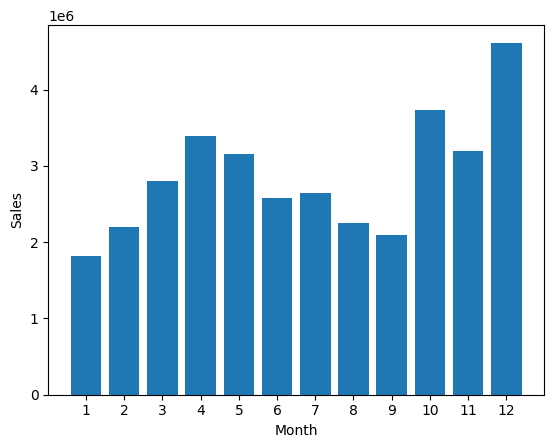

In [47]:
# Group the dataset by 'Month' and calculate the sum of all numeric columns
# numeric_only=True ensures only numerical data (e.g., Quantity, Price, Total) is summed,
# ignoring non-numeric columns like 'Product', 'Address', 'Order Date' etc.
result = all_month_sales.groupby("Month").sum(numeric_only=True)

# Print all month-wise totals
print("All Month Sales:\n", result)

# --- Find the month with the highest sales ---
# 1. Find which month (row) has the maximum 'Total Ordered Price'
max_month = result["Total Orderd Price"].idxmax()  # returns the month number (e.g., 12)
max_value = result["Total Orderd Price"].max()     # returns the highest sales amount

# 2. Print that month's complete data (all numeric columns)
print(f"\nMonth with Highest Sales: {max_month}")
print(f"Highest Sales Amount: {max_value}")
print("\nFull Data for that Month:\n", result.loc[max_month])

# Create a bar chart where:
#   x-axis = months (from the grouped index)
#   y-axis = total ordered price for each month
plt.bar(result.index, result["Total Orderd Price"])

# Set x-axis tick marks to show actual month numbers (e.g., 1 to 12)
plt.xticks(result.index)

# Label the x-axis as "Month"
plt.xlabel("Month")

# Label the y-axis as "Sales" to represent total sales per month
plt.ylabel("Sales")

# Display the bar chart
plt.show()


## Q2.What city has the highest number of sales?

In [52]:
# Extract the city part from the address
def get_city(address: str) -> str:
    # Example address: "123 Main St, Los Angeles, CA 90001"
    # After split by comma → ['123 Main St', ' Los Angeles', ' CA 90001']
    # Index [1] → ' Los Angeles' → city name
    return address.split(",")[1]

# Extract the state abbreviation (like 'CA')
def get_state(address: str) -> str:
    # Same example: ['123 Main St', ' Los Angeles', ' CA 90001']
    # Take part [2] → ' CA 90001'
    # Now split by space → ['', 'CA', '90001']
    #   index [0] → '' (empty, because of leading space)
    #   index [1] → 'CA' (the actual state)
    # That’s why we use [1], not [0]
    return address.split(",")[2].split(" ")[1]

# Combine City and State as "City(State)"
all_month_sales["City"] = all_month_sales["Purchase Address"].apply(
    lambda x: f"{get_city(x)}({get_state(x)})"
)

result = all_month_sales.groupby("City").sum(numeric_only=True)

result

,Quantity Ordered,Price Each,Month,Total Orderd Price
City,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58
Austin(TX),11153,1809873.61,69829,1819581.75
Boston(MA),22528,3637409.77,141112,3661642.01
Dallas(TX),16730,2752627.82,104620,2767975.40
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Portland(ME),2750,447189.25,17144,449758.27
Portland(OR),11303,1860558.22,70621,1870732.34
San Francisco(CA),50239,8211461.74,315520,8262203.91
